In [31]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score

In [32]:
# load the dataset
df = pd.read_csv("Downloads/data.csv")

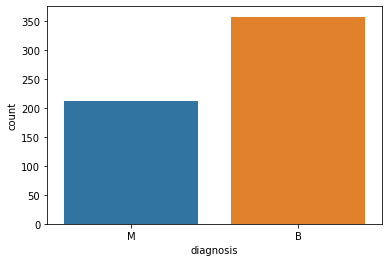

In [33]:
sns.countplot(x="diagnosis", data=df)
plt.show()

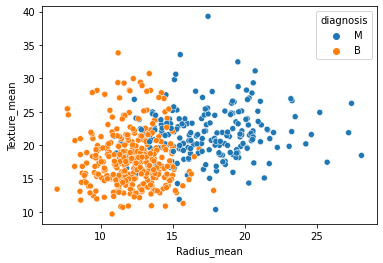

In [34]:
sns.scatterplot(x="Radius_mean", y="Texture_mean", hue="diagnosis", data=df)
plt.show()

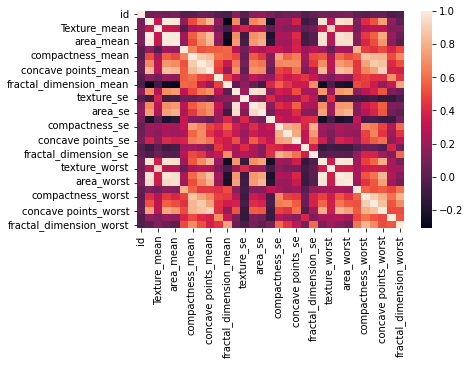

In [35]:
sns.heatmap(df.corr())
plt.show()

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   Radius_mean              569 non-null    float64
 3   Texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [37]:
df.head()

,id,diagnosis,Radius_mean,Texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,21.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [38]:
df.isnull().sum()

id                         0
diagnosis                  0
Radius_mean                0
Texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [39]:
df = df.drop("id", axis=1)
df = df.dropna()

# separate the features and target
X = df.drop("diagnosis", axis=1)
y = df["diagnosis"]

In [40]:
# standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

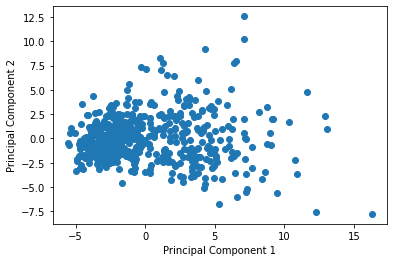

In [41]:
# dimensionality reduction
pca = PCA(n_components=10)
X_pca = pca.fit_transform(X_scaled)
plt.scatter(X_pca[:, 0], X_pca[:, 1])
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.show()

In [42]:
# split the data into a training set and a test set
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2)

In [43]:
param_grid = {'C': [0.1, 1, 10, 100], 'gamma': [0.1, 0.01, 0.001], 'kernel': ['linear', 'rbf', 'poly']}

In [44]:
grid = GridSearchCV(SVC(), param_grid, cv=5)

In [45]:
grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100], 'gamma': [0.1, 0.01, 0.001],
                         'kernel': ['linear', 'rbf', 'poly']})

In [46]:
print(grid.best_params_)
print(grid.best_score_)

{'C': 10, 'gamma': 0.01, 'kernel': 'rbf'}
0.9802197802197803


In [47]:
model = SVC(**grid.best_params_)

In [48]:
kfold = KFold(n_splits=10, shuffle=True)
scores = cross_val_score(model, X_pca, y, cv=kfold)

In [49]:
print(f"Mean score: {scores.mean():.3f}")
print(f"Standard deviation: {scores.std():.3f}")

Mean score: 0.981
Standard deviation: 0.020


In [50]:
model.fit(X_pca, y)

SVC(C=10, gamma=0.01)

In [51]:
y_pred = model.predict(X_test)

# print the classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           B       0.99      1.00      0.99        72
           M       1.00      0.98      0.99        42

    accuracy                           0.99       114
   macro avg       0.99      0.99      0.99       114
weighted avg       0.99      0.99      0.99       114



In [52]:
print(confusion_matrix(y_test, y_pred))

[[72  0]
 [ 1 41]]


In [53]:
print(f"Accuracy: {accuracy_score(y_test, y_pred):.3f}")
print(f"Precision: {precision_score(y_test, y_pred, pos_label='M'):.3f}")
print(f"Recall: {recall_score(y_test, y_pred, pos_label='M'):.3f}")

Accuracy: 0.991
Precision: 1.000
Recall: 0.976


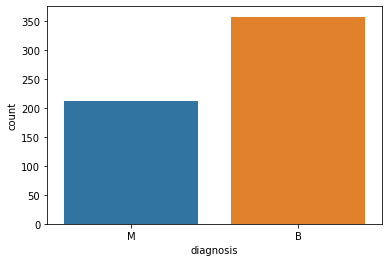

In [54]:
sns.countplot(x="diagnosis", data=df)
plt.show()

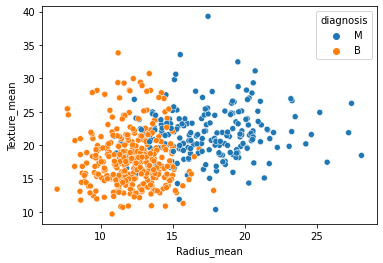

In [56]:
sns.scatterplot(x="Radius_mean", y="Texture_mean", hue="diagnosis", data=df)
plt.show()